# Gaussian Discriminant Analysis Applications

If you want to learn about Gaussian Discriminant Analysis, read [this](https://github.com/tugrulhkarabulut/Gaussian-Discriminant-Analysis/blob/master/GaussianDiscriminantAnalysisApplication.pdf)

Also, you can check out my implementation of the algorithm from [here](https://github.com/tugrulhkarabulut/Gaussian-Discriminant-Analysis/blob/master/GaussianDiscriminantAnalysis.py)

In [1]:
import numpy as np
import pandas as pd

from GaussianDiscriminantAnalysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# Check the GaussianDiscriminantAnalysis.py for implementations

In [2]:
def train_test_split(X, ratio):
    X_shuffled = np.copy(X)
    np.random.shuffle(X_shuffled)
    return X_shuffled[:int(len(X_shuffled) * ratio)], X_shuffled[int(len(X_shuffled) * ratio):]

In [3]:
"""
    Dataset is from the UCI Machine Learning Repository
    https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
"""
df = pd.read_csv('chronic_kidney_disease.csv', header = None, error_bad_lines=False)
df.columns = [
    'age',
    'bp',
    'sp',
    'al',
    'su',
    'rbc',
    'pc',
    'pcc',
    'ba',
    'bgr',
    'bu',
    'sc',
    'sod',
    'pot',
    'hemo',
    'pcv',
    'wc',
    'rc',
    'htn',
    'dm',
    'cad',
    'appet',
    'pe',
    'ane',
    'class'
]

b'Skipping line 70: expected 25 fields, saw 26\nSkipping line 73: expected 25 fields, saw 26\nSkipping line 370: expected 25 fields, saw 26\n'


In [4]:
df

,age,bp,sp,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
df.replace({'?': np.nan}, inplace=True)
df.dropna(inplace=True)
df

,age,bp,sp,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
df['age'] = df['age'].astype('int')
df['bp'] = df['bp'].astype('int')
df['pcv'] = df['pcv'].astype('int')
df['wc'] = df['wc'].astype('int')
df['rc'] = df['rc'].astype('float')

df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes

In [7]:
df.describe()

,age,bp,pcv,wc,rc,class
count,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000
mean,49.401274,74.076433,41.891720,8464.33121,4.892357,0.726115
std,15.427190,11.206421,9.128414,3133.46316,1.022600,0.447378
min,6.000000,50.000000,9.000000,3800.00000,2.100000,0.000000
25%,39.000000,60.000000,37.000000,6500.00000,4.500000,0.000000
50%,50.000000,80.000000,44.000000,7800.00000,5.000000,1.000000
75%,60.000000,80.000000,48.000000,9700.00000,5.600000,1.000000
max,83.000000,110.000000,54.000000,26400.00000,8.000000,1.000000


In [8]:
df.corr()

,age,bp,pcv,wc,rc,class
age,1.000000,0.084286,-0.242078,0.148446,-0.243401,-0.314621
bp,0.084286,1.000000,-0.352838,0.009644,-0.228845,-0.325676
pcv,-0.242078,-0.352838,1.000000,-0.351894,0.739774,0.827751
wc,0.148446,0.009644,-0.351894,1.000000,-0.272358,-0.410786
rc,-0.243401,-0.228845,0.739774,-0.272358,1.000000,0.721208
class,-0.314621,-0.325676,0.827751,-0.410786,0.721208,1.000000


In [9]:
data = df[['age', 'wc', 'rc', 'class']].values

In [10]:
train_data, test_data = train_test_split(data, ratio=0.8)

X_train = train_data[:, :3]
y_train = train_data[:, -1]

X_test = test_data[:, :3]
y_test = test_data[:, -1]

In [11]:
model_linear = LinearDiscriminantAnalysis()
model_linear.fit(X_train, y_train)

In [12]:
y_pred = model_linear.predict(X_test)

In [13]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [14]:
y_test[y_test==0].size, y_pred[y_pred == 0].size

(9, 7)

In [15]:
y_test[y_test==1].size, y_pred[y_pred == 1].size

(23, 25)

In [16]:
y_test[y_test == y_pred].size / y_test.size

0.9375

In [17]:
model_quad = QuadraticDiscriminantAnalysis()
model_quad.fit(X_train, y_train)

In [18]:
y_pred = model_quad.predict(X_test)

In [19]:
y_test[y_test==0].size, y_pred[y_pred == 0].size

(9, 8)

In [20]:
y_test[y_test==1].size, y_pred[y_pred == 1].size

(23, 24)

In [21]:
y_test[y_test == y_pred].size / y_test.size

0.96875

In [22]:
"""
    Dataset is from the UCI Machine Learning Repository
    https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling
"""
df_exam = pd.read_excel('exam_data_.xls')
df_exam

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [23]:
df_exam.columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']

In [24]:
df_exam['UNS'] = df_exam['UNS'].astype('category')
df_exam['UNS'] = df_exam['UNS'].cat.codes

In [25]:
df_exam.corr()

,STG,SCG,STR,LPR,PEG,UNS
STG,1.000000,0.081035,0.040841,0.099543,0.206359,-0.074570
SCG,0.081035,1.000000,0.083732,0.097816,0.182792,-0.210050
STR,0.040841,0.083732,1.000000,0.036481,0.120779,-0.060510
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574,-0.263670
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000,-0.488249
UNS,-0.074570,-0.210050,-0.060510,-0.263670,-0.488249,1.000000


In [26]:
data = df_exam[['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']].values

train_data, test_data = train_test_split(data, ratio=0.8)

X_train = train_data[:, :-1]
y_train = train_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

GDA makes stronger modeling assumptions about the data than does logistic regression. It turns out that when these modeling assumptions are correct, then GDA will find better fits to the data, and is a better model. Specifically, when $p(x|y)$ is indeed gaussian (with shared Σ), then GDA is asymptotically efficient.
If we see the distributions of $p(x|y)$ for all classes for y, we will have a better perspective.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


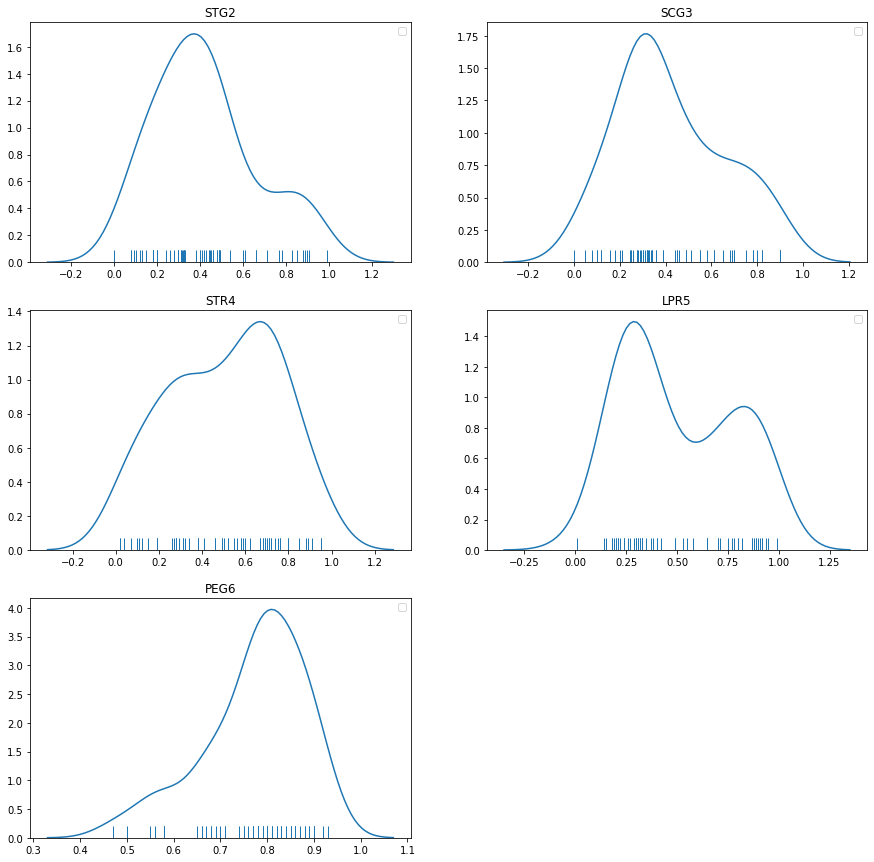

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


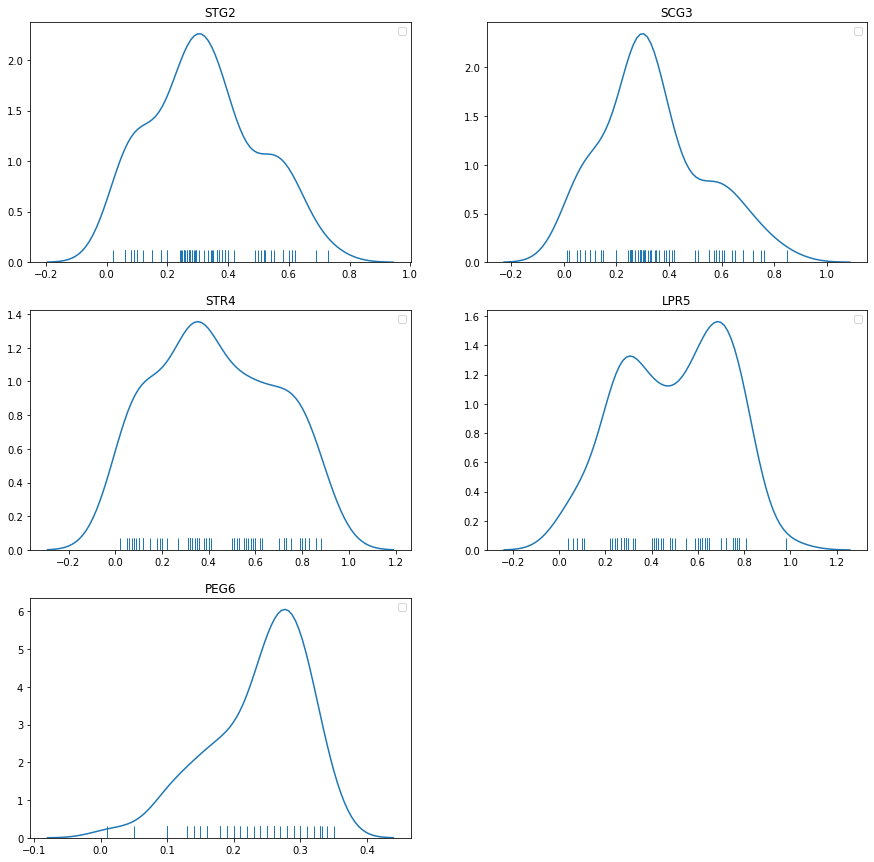

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


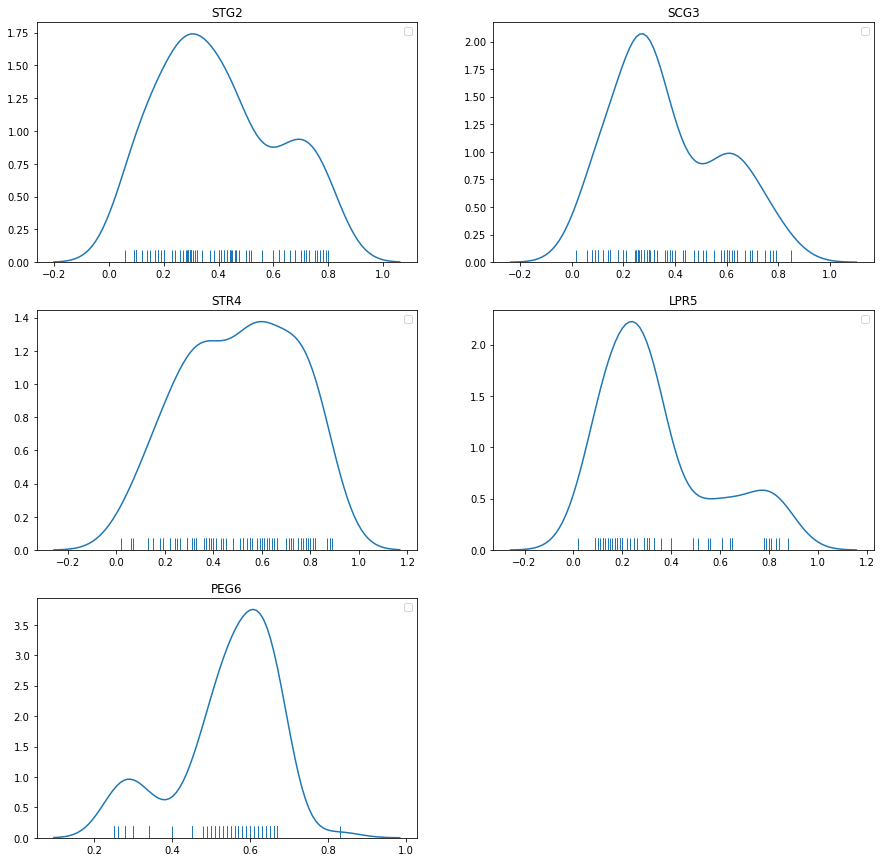

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


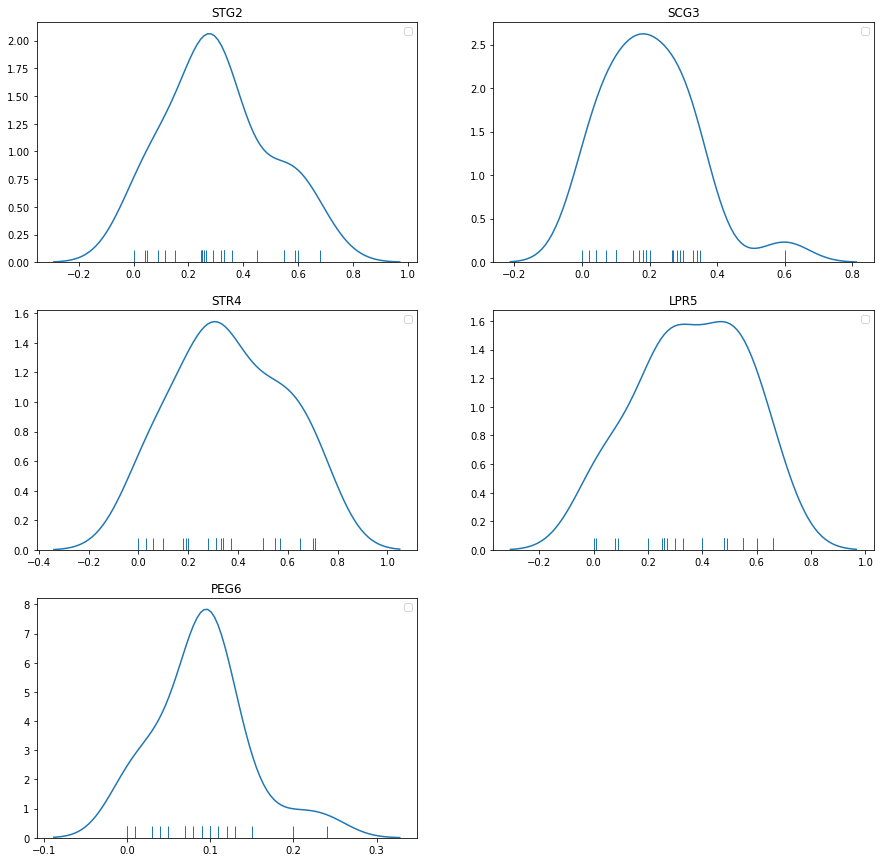

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
pxydf = {}
pxydf[3] = df_exam[df_exam['UNS'] == 3]
del pxydf[3]['UNS']
pxydf[2] = df_exam[df_exam['UNS']== 2]
del pxydf[2]['UNS']
pxydf[1] = df_exam[df_exam['UNS']== 1]
del pxydf[1]['UNS']
pxydf[0] = df_exam[df_exam['UNS']== 0]
del pxydf[0]['UNS']

for j in range(len(pxydf)): 
    i=1
    fig = plt.figure(figsize=(15,15))
    for columns in pxydf[i].columns:
        fig.add_subplot(3,2,i)
        i = i+1
        fig.set_figheight(15)
        fig.set_figwidth(15)
        sns.distplot(pxydf[j][[columns]], hist=False, rug=True)
        plt.title(columns+str(i))
        plt.legend()
    plt.show()

In [28]:
model_exam = LinearDiscriminantAnalysis()
model_exam.fit(X_train, y_train)

In [29]:
y_pred = model_exam.predict(X_test)

In [30]:
y_test[y_pred == y_test].size / y_test.size

0.9230769230769231

In [31]:
model_quad = QuadraticDiscriminantAnalysis()
model_quad.fit(X_train, y_train)

In [32]:
y_pred = model_quad.predict(X_test)

In [33]:
y_test[y_test == y_pred].size / y_test.size

0.9615384615384616